# Projet Python : Machine Learning

## Le contexte :
Vous êtes un data scientist pour un client (fictif ou non) et vous devez présenter une analyse de données complètes, de la spécification des besoins, élaboration d’une problématique pertinente ainsi qu’une mise en oeuvre technique respectant les conditions ci-dessous.

## Le livrable :
- Jupyter notebook ou une application Streamlit 
- le travail devra être déposé sur un gist/git (le lien devra être publique et actif jusqu’à la fin de la scolarité de l’étudiant) et devra être envoyé par mail ou messagerie Slack

## Contraintes :
- Data avec minimum 10 colonnes 
- Un maximum de commentaires dans le code
- Texte type Markdown après chaque graphique/tableau (ex: description textuelle des features après chargement)
- Tous les graphiques doivent être lisible (taille du graphique, infos représenté), si diagramme pas lisible, en faire une version filtrée dessous
- Exposer concrètement votre problématique / question à définir : quel est le but de votre modèle et à quelle situation métier peut il correspondre ?

## Partie 1 : Analyse graphique des données (EDA) :
- Diagrammes de répartition des données (type gaussienne sur les données)
- Vérification du nombre de données, si plusieurs données sont peu représentés (<5%) alors regrouper dans une seule et même catégorie, 1 pie chart avant/apres
- Nettoyage des données manquantes, encodage (OneHot, dictionnaire ou Sklearn Encoder)
- Boites à moustache avec données extrêmes
- Heatmap + observations sur les corrélations

## Partie 2: Model Building :
- Choisir 1 algorithmes et faire varier ses paramètres (ex: max_depth, n_estimators,….)
- Faire une veille (300 mots minimum) sur votre algorithme et expliquer le choix de vos paramètres 
- Affichage des metrics classique (precision, r2, confusion matrix, accuracy…)
- Sélection du meilleur paramétrage (si pas le temps expliquer votre approche)
- Le model est-il en overfitting/underfitting/OK ?

## Partie 3: Features Importance :
- Affichage sous forme de barplot (si classification sinon afficher les coefficients de votre regression et commentez)
- Commentaire pertinents / hypothèse que vous pouvez formuler à partir de votre analyse

## Partie 4: Model Réexécution avec les features sélectionnés :
- Affichage des metrics standard et commentaire sur la pertinence

## Import

On commence par importer les librairies qui seront utilisées pendant ce projet

In [1]:
## Librairies générales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Composants sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, classification_report, plot_roc_curve

print('libs loaded')

libs loaded


## Initialisation

### Thème seaborn

In [2]:
sns.set_theme()

### Le dataset

In [3]:
ds = pd.read_csv("./../data/student-por.csv")
ds

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


## Expression du sujet

### Description du jeu de données

On observe ici un jeu de données fournissant des informations sur des étudiants comprenant entre autre:
- L'école dans laquelle ils sont parmis 2
- Le sexe
- L'éducation et le travail des parents
- Les absences
- La note sur 20 par trimestre

### Problématique

#### *Peut-on prédire les notes d'un élèves à partir des informations venant d'un formulaire ?*

## Partie 1 : Analyse graphique des données (EDA)

*Cette partie est déjà traitée dans le projet d'analyse de data visualisation dont la conslusion est qu'il semblerait que plusieurs paramètres affectent la note d'un élève. Il est donc cohérent de maintenant chercher à savoir s'il est possible à partir de ces paramètres de prédire la note de l'élève*

### Nettoyage des données manquantes

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Toutes les colonnes possèdent le même nombre de lignes. Il ne manque donc pas de données dans le dataset.

### Encodage des données

En observant le résultat du `ds.info()` au-dessus on observe que certaines colonnes sont des *object* et donc des chaînes de caractères. Or, notre algorithme a besoin de recevoir des valeurs de type *int*, *float* ou *boolean*.
Nous allons donc devoir encoder ces valeurs afin de les rendre exploitables par notre algorithme. Pour cela nous allons utiliser le `LabelEncoder` de `sklearn` et les tranformer en données utilisables.
Les paramètres que nous allons encoder sont tous ceux dont le *dtype* est *object* donc :
- school
- sex
- address
- famsize
- Pstatus
- Mjob
- Pjob
- reason
- guardian
- schoolsup
- famsup
- paid
- activities
- nursery
- higher
- internet
- romantic

In [5]:
le_school = LabelEncoder()
ds["school"] = le_school.fit_transform(ds["school"])

le_sex = LabelEncoder()
ds["sex"] = le_sex.fit_transform(ds["sex"])

le_address = LabelEncoder()
ds["address"] = le_address.fit_transform(ds["address"])

le_famsize = LabelEncoder()
ds["famsize"] = le_famsize.fit_transform(ds["famsize"])

le_Pstatus = LabelEncoder()
ds["Pstatus"] = le_Pstatus.fit_transform(ds["Pstatus"])

le_Mjob = LabelEncoder()
ds["Mjob"] = le_Mjob.fit_transform(ds["Mjob"])

le_Fjob = LabelEncoder()
ds["Fjob"] = le_Fjob.fit_transform(ds["Fjob"])

le_reason = LabelEncoder()
ds["reason"] = le_reason.fit_transform(ds["reason"])

le_guardian = LabelEncoder()
ds["guardian"] = le_guardian.fit_transform(ds["guardian"])

le_schoolsup = LabelEncoder()
ds["schoolsup"] = le_schoolsup.fit_transform(ds["schoolsup"])

le_famsup = LabelEncoder()
ds["famsup"] = le_famsup.fit_transform(ds["famsup"])

le_paid = LabelEncoder()
ds["paid"] = le_paid.fit_transform(ds["paid"])

le_activities = LabelEncoder()
ds["activities"] = le_activities.fit_transform(ds["activities"])

le_nursery = LabelEncoder()
ds["nursery"] = le_nursery.fit_transform(ds["nursery"])

le_higher = LabelEncoder()
ds["higher"] = le_higher.fit_transform(ds["higher"])

le_internet = LabelEncoder()
ds["internet"] = le_internet.fit_transform(ds["internet"])

le_romantic = LabelEncoder()
ds["romantic"] = le_romantic.fit_transform(ds["romantic"])

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      649 non-null    int32
 1   sex         649 non-null    int32
 2   age         649 non-null    int64
 3   address     649 non-null    int32
 4   famsize     649 non-null    int32
 5   Pstatus     649 non-null    int32
 6   Medu        649 non-null    int64
 7   Fedu        649 non-null    int64
 8   Mjob        649 non-null    int32
 9   Fjob        649 non-null    int32
 10  reason      649 non-null    int32
 11  guardian    649 non-null    int32
 12  traveltime  649 non-null    int64
 13  studytime   649 non-null    int64
 14  failures    649 non-null    int64
 15  schoolsup   649 non-null    int32
 16  famsup      649 non-null    int32
 17  paid        649 non-null    int32
 18  activities  649 non-null    int32
 19  nursery     649 non-null    int32
 20  higher      649 non-null    int3

Toutes les données sont maintenant des *int* et peuvent donc être traitées.

### Préparation des données

Comme vu dans le projet précédent les notes entre les trimestres semblent fortement similaires. Nous expliquions cela par le fait que l'élève ne change pas d'un trimestre à l'autre. Ainsi, pour ce projet où nous tentons de vérifier la prédictabilité de ces notes, nous en utiliserons la moyenne des 3 trimestres.

In [7]:
ds["meanGrade"] = round((ds["G1"] + ds["G2"] + ds["G3"]) / 3, 2)
ds

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,meanGrade
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,4,0,11,11,7.33
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,2,9,11,11,10.33
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,6,12,13,12,12.33
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,0,14,14,14,14.00
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,0,11,13,13,12.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,3,2,...,4,2,1,2,5,4,10,11,10,10.33
645,1,0,18,1,1,1,3,1,4,3,...,3,4,1,1,1,4,15,15,16,15.33
646,1,0,18,1,0,1,1,1,2,2,...,1,1,1,1,5,6,11,12,9,10.67
647,1,1,17,1,1,1,3,1,3,3,...,4,5,3,4,2,6,10,10,10,10.00


Nous allons maintenant préparer la liste des colonnes qui seront conservées pour la prédiction

In [8]:
allColumns = ["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "guardian", "traveltime", "studytime", 
           "failures", "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "absences", "meanGrade"]
sampleColums = ["Medu", "Fedu", "Mjob", "Fjob", "failures", "absences", "meanGrade"]

## Partie 2.a : Model Building (LinearRegression)

### Veille

*Pour consulter la veille allez lire [ce fichier](https://github.com/MorcilloA/Rendus_Python/tree/master/ML/projet/veille_LinearRegression.pdf)*

### Application de l'algorithme

Ici nous commençons par remplir deux variables qui seront respectivement nos données à corréler et la cible.

In [9]:
X = ds[allColumns[:-1]]
y = ds["meanGrade"]

Ensuite on resépare les deux éléments précédents en deux à nouveau. Une partie servant d'entraînement et une autre de test pour vérifier si notre algorithme a suffisamment appris.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
"train : {} | test : {}".format(X_train.shape, X_test.shape)

'train : (519, 30) | test : (130, 30)'

On instancie le Régresseur linéaire, puis on l'entraînement sur la portion d'entraînement du jeu de données. Cela signifie qu'on lui donne à la fois les données ET la cible afin qu'il trouve les liens existants supposément entre les deux.

In [11]:
linReg = LinearRegression()

In [12]:
linReg.fit(X_train, y_train)

LinearRegression()

In [13]:
linReg.coef_

array([-1.11712839, -0.39492934,  0.19036792,  0.237018  ,  0.42615552,
        0.34837419,  0.14973942,  0.16536508,  0.01895003,  0.095457  ,
        0.11940216, -0.12831441,  0.0023071 ,  0.24895525, -1.39400158,
       -1.16242231,  0.10179518, -0.51392791,  0.43334452, -0.33710111,
        1.79070924,  0.37132874, -0.36003235,  0.069047  ,  0.00590563,
       -0.10814781, -0.19144364, -0.15676509, -0.130311  , -0.05381632])

On peut remarquer qu'utiliser toutes les colonnes de notre jeu de données est peut-être trop. Utilisons une partie de ces colonnes en nous basant sur l'analyse de données réalisée préalablement et faisant remonter certaines corrélations potentielles entre les notes et les absences, l'éducation des parents et le redoublement

In [14]:
X = ds[sampleColums[:-1]]
y = ds["meanGrade"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
"train : {} | test : {}".format(X_train.shape, X_test.shape)

'train : (519, 6) | test : (130, 6)'

In [15]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)
linReg.coef_

array([ 0.30175242,  0.23179844,  0.09850823,  0.02239309, -1.76867722,
       -0.04465676])

Selon ces données, il semble que les éléments qui vont le plus impacter la prédiction de l'algorithme soient l'éducation de la mère qui plus elle est haute plus la prédiction sera haute et les absences qui à l'inverse auraient tendance à faire baisser la prédiction lorsque leur nombre augmente.

In [16]:
linReg.intercept_

10.645448779168285

In [17]:
linReg.score(X_train, y_train)

0.2122125580834897

In [18]:
y_pred = linReg.predict(X_test)

In [19]:
linReg.score(X_test, y_test)

0.21684454008025134

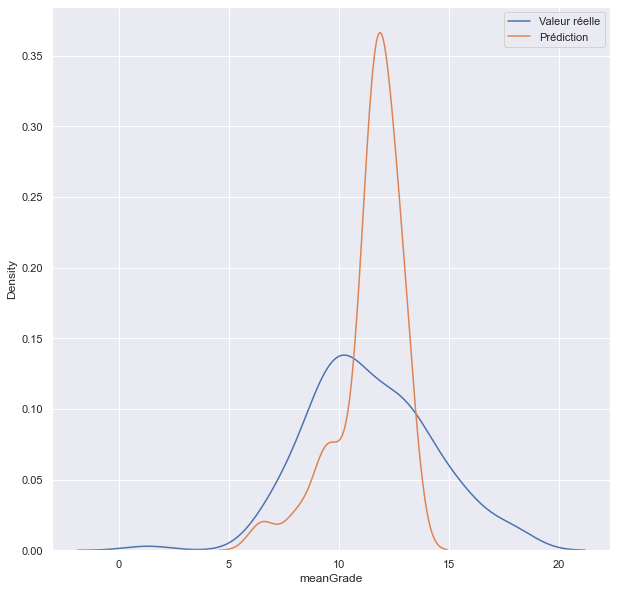

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
sns.kdeplot(y_test, label="Valeur réelle")
sns.kdeplot(y_pred, label="Prédiction")
plt.legend()
plt.show()

Ce schéma compare le taux d'apparition réelle d'une moyenne (en bleu) et le taux d'apparition de ces mêmes moyennes dans les prédictions (en rouge). En observant le schéma il semble que notre algotihme manque de précision même si on observe un suivi de la courbe. Se sont les valeurs valeurs plus "extrêmes" (moins de 5 ou plus de 15) qui ont plus de mal à être définies. Cela sonne comme une situation d'underfitting. Pour résoudre celle-ci, il faudrait peut-être cumuler les données de plusieurs années pour permettre à l'algorithme de s'entraîner suffisamment.

## Partie 2.b : Model Building (RandomForestRegressor)

### Veille

*Pour consulter la veille allez lire [ce fichier](https://github.com/MorcilloA/Rendus_Python/tree/master/ML/projet/veille_RandomForestRegressor.pdf)*

### Application de l'algorithme

Nous allons commencer par réinitialiser nos variables X_train, X_test, y_train et y_test mais cette fois avec toutes les colonnes.

In [27]:
X = ds[allColumns[:-1]]
y = ds["meanGrade"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
"train : {} | test : {}".format(X_train.shape, X_test.shape)

'train : (519, 30) | test : (130, 30)'

Ensuite, on initialise la forêt d'arbres de régression et on l'entraîne avec le jeu de données d'entraînement.

In [28]:
rfr = RandomForestRegressor(n_estimators=100, max_depth=5)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=5)

Maintenant qu'il est entraîné nous allons lancer notre algorithme

In [29]:
y_pred = rfr.predict(X_test)

Nous allons maintenant calculer la précision des résultats de notre algorithme

In [30]:
accuracy = mean_absolute_percentage_error(y_test, y_pred)
# accuracy
"accuracy {}%".format(accuracy.round(4)*100)

'accuracy 20.599999999999998%'

La précision ressortant de l'algorithme semble être d'environ 20%. L'apparence faible de cette dernière s'explique par le fait que la données recherchée est très précise. En effet, on recherche une

In [31]:
feature_imp = pd.Series(rfr.feature_importances_,index=allColumns[:-1]).sort_values(ascending=False)
feature_imp

failures      0.340974
higher        0.077730
school        0.055216
Dalc          0.054860
Medu          0.047082
absences      0.039394
studytime     0.038030
Walc          0.032542
Fedu          0.028970
goout         0.028645
reason        0.026529
address       0.024853
age           0.024268
schoolsup     0.023637
Fjob          0.020385
Mjob          0.019574
freetime      0.018204
health        0.013099
sex           0.012447
internet      0.010509
famrel        0.009886
romantic      0.009485
famsup        0.008872
traveltime    0.007930
Pstatus       0.006725
famsize       0.006154
activities    0.005833
guardian      0.004103
nursery       0.003447
paid          0.000616
dtype: float64

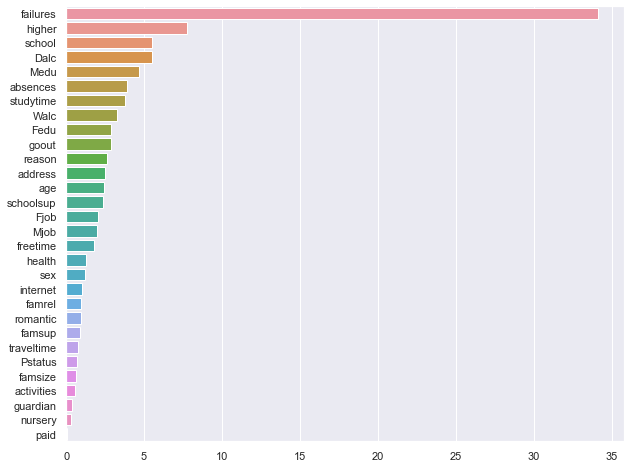

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x=feature_imp.values*100, y=feature_imp.keys())

Comme on peut le voir la feature la plus importante, de loin, est le fait que l'élève ait déjà raté une année scolaire. Ensuite apparaissent avec moins de différence avec les autres la volonté de faire des études supérieurs, l'école choisie et la consommation d'alcool en semaine.

## Conclusion

Pour conclure cette étude, il semble qu'il serait possible de mettre au point un algorithme pouvant se rapprocher de la prédiction de la moyenne d'un élève à condition de pouvoir mieux entraîner l'algorithme. Evidemment dans tous les cas cette prédiction resterait une approximation et il semble plutôt qu'il s'agisse de donner un ordre d'idée de la note.

D'autres questions peuvent donc apparaître ici aussi :
- Quelle quantité de données faudrait-il réunir pour perfectionner l'algorithme ?
- A partir de quelle précision pourions-nous estimer que l'algorithme est satisfaisant ?